In [1]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [2]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=ofHVr4ix9hyZV5GRT5ScJAEvYrhUM7&access_type=offline


,id,joke,origin_id,culture,category,description,title,c1_name,c2_name,c1_gender,...,c1_2,c2_2,n_3,c1_3,c2_3,n_4,c1_4,c2_4,script_flow,image_id
9,1109,Why are mummys scared of vacation? They're afr...,7Uvc29hFIBd,General,icanhazdadjoke,A humorous punchline about mummies and vacations.,Afraid to Unwind,Archaeologist,Mummy,male,...,Because you're afraid to unwind!,"Haha, good one!",They both laugh together at the joke.,Glad you liked it!,Got any more?,The archaeologist and mummy continue their con...,Maybe later!,Can't wait!,"[n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...",KNc6p5WTh9FYhrBj


### Code 101&102: Generate Story and Images

In [36]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

What musical instrument is found in the bathroom? A tuba toothpaste.


In [37]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [38]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

Success: Story Data Updated
Success: Image Preprocessing
Success: New Docs Created
{'1119_BathroomSymphony': '1QCY1yCB-j6PylOhknSyl8PZfMzNyxKwpqrqW7ctO8WY'}


### Code 104: SNS Messages

In [43]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1100_ShelfBlame.json' and branch: 'main'
  - documentId: 1Ure1gXAeWQUAohk2nrrxWwH4Gx6Elpqj6YvTiNPgBe8
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1101_BarkBark.json' and branch: 'main'
  - documentId: 14MA8Ys2FdoE9HUt9eHoSxBtyoMJ_S-SGApnNFIiMrL8
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1102_ABitCorny.json' and branch: 'main'
  - documentId: 1cbkGzTzfToO7zJOCFmbEMQrxdlz44GlA5qMjw-v7AyA
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Acti

x

### Video Creation

In [17]:
# Define ids of video to be generated
ID_LIST = [i for i in range(1105, 1110)]
# Crop mode
CROP_MODE = 'auto'

In [18]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: CROP_MODE for id_ in ID_LIST})
clip.copy(exp_crop_mode)

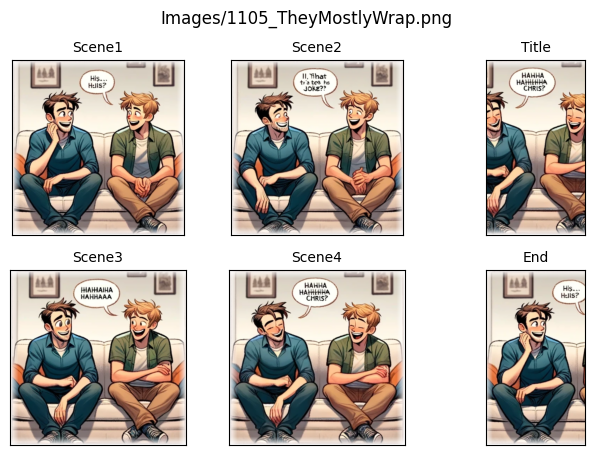

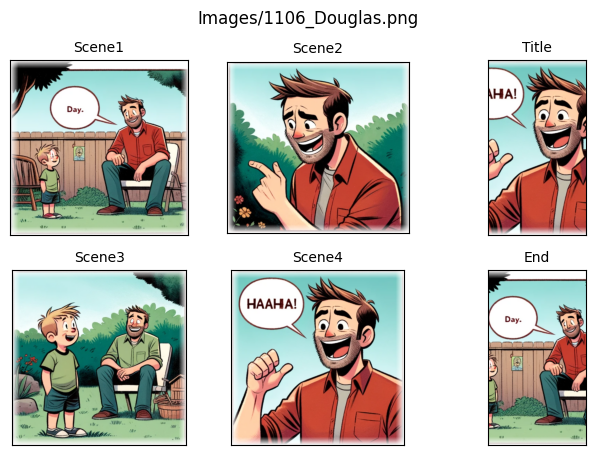

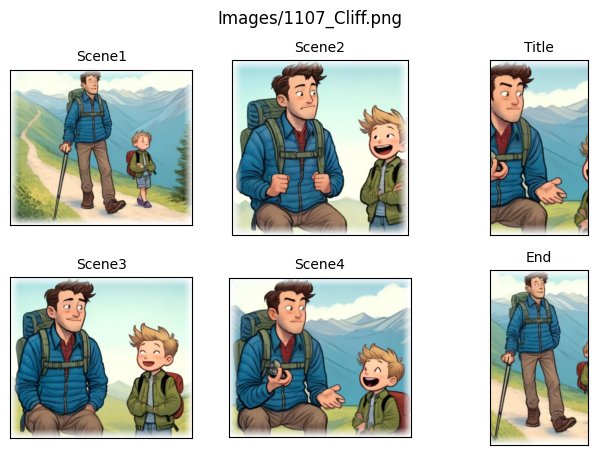

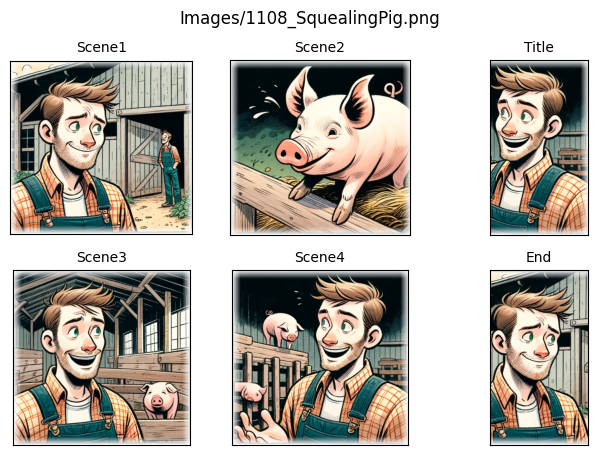

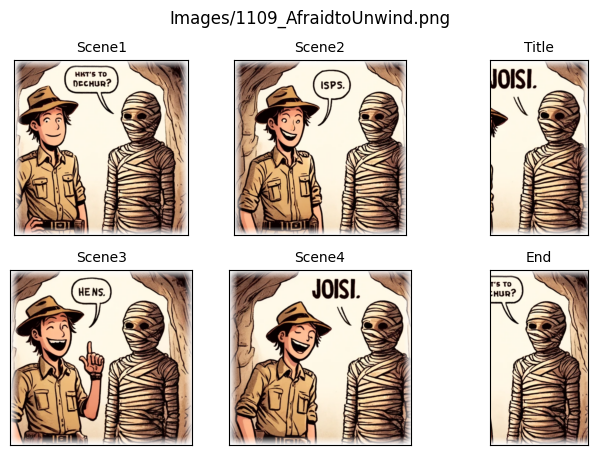

In [19]:
# Get list of image paths
args = [{'path': f"Images/{p}", 'mode': CROP_MODE} for p in os.listdir('Images') if int(p.split('_')[0]) in ID_LIST]

# Test image cropping
video.image_crop_test(args)

In [20]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here 'auto' or 'manual'
crop_mode = {1105: 'auto', 1106: 'auto', 1107: 'auto', 1108: 'auto', 1109: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=ID_LIST, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

Moviepy - Building video Videos/1105_TheyMostlyWrap.mp4.
MoviePy - Writing audio in 1105_TheyMostlyWrapTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1105_TheyMostlyWrap.mp4



Moviepy - Done !
Moviepy - video ready Videos/1105_TheyMostlyWrap.mp4
Moviepy - Building video Videos/1106_Douglas.mp4.
MoviePy - Writing audio in 1106_DouglasTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1106_Douglas.mp4



Moviepy - Done !
Moviepy - video ready Videos/1106_Douglas.mp4
Moviepy - Building video Videos/1107_Cliff.mp4.
MoviePy - Writing audio in 1107_CliffTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1107_Cliff.mp4



Moviepy - Done !
Moviepy - video ready Videos/1107_Cliff.mp4
Moviepy - Building video Videos/1108_SquealingPig.mp4.
MoviePy - Writing audio in 1108_SquealingPigTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1108_SquealingPig.mp4



Moviepy - Done !
Moviepy - video ready Videos/1108_SquealingPig.mp4
Moviepy - Building video Videos/1109_AfraidtoUnwind.mp4.
MoviePy - Writing audio in 1109_AfraidtoUnwindTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1109_AfraidtoUnwind.mp4



Moviepy - Done !
Moviepy - video ready Videos/1109_AfraidtoUnwind.mp4
['1105_TheyMostlyWrap', '1106_Douglas', '1107_Cliff', '1108_SquealingPig', '1109_AfraidtoUnwind']


### Video Schedule Post

In [21]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [22]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


,Title,Content,Path,Schedule
0,Joke Story: Shelf Blame,"📚🤕 Dive into ""Shelf Blame,"" a tale of misadven...",Videos/1100_ShelfBlame.mp4,2024-05-27T12:00:00Z
1,Joke Story: Bark Bark,"🌳🐶 Dive into ""Bark Bark,"" a playful exchange b...",Videos/1101_BarkBark.mp4,2024-05-27T13:00:00Z
2,Joke Story: ABit Corny,"🌽😂 Dive into ""A Bit Corny,"" where veggie jokes...",Videos/1102_ABitCorny.mp4,2024-05-28T12:00:00Z
3,Joke Story: Resistinga Rest,"🛏️😴 Dive into ""Resisting a Rest,"" where nap ti...",Videos/1103_ResistingaRest.mp4,2024-05-28T13:00:00Z
4,Joke Story: AFootof Nose,"👃📏 Dive into ""A Foot of Nose,"" where nose joke...",Videos/1104_AFootofNose.mp4,2024-05-29T12:00:00Z
5,Joke Story: They Mostly Wrap,"🎶🎤 Dive into ""They Mostly Wrap,"" where music g...",Videos/1105_TheyMostlyWrap.mp4,2024-05-29T13:00:00Z
6,Joke Story: Douglas,"👦⛏️ Dive into ""Douglas,"" where hole-digging ge...",Videos/1106_Douglas.mp4,2024-05-30T12:00:00Z
7,Joke Story: Cliff,"🚶‍♂️🧗‍♂️ Dive into ""Cliff,"" where mountain cli...",Videos/1107_Cliff.mp4,2024-05-30T13:00:00Z
8,Joke Story: Squealing Pig,"👨‍🌾🐷 Dive into ""Squealing Pig,"" where secrets ...",Videos/1108_SquealingPig.mp4,2024-05-31T12:00:00Z
9,Joke Story: Afraidto Unwind,"🏺😨 Dive into ""Afraid to Unwind,"" where mummies...",Videos/1109_AfraidtoUnwind.mp4,2024-05-31T13:00:00Z


In [4]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': 'F4VXc37GJcM'}
{'status': 'success', 'videoId': 'n4Yhfw54PzA'}
{'status': 'success', 'videoId': 'wvZvEYqRjg4'}
{'status': 'success', 'videoId': 'xUkcAkMAn4s'}


In [24]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ['Joke Story: Douglas', 'Joke Story: Cliff', 'Joke Story: Squealing Pig', 'Joke Story: Afraidto Unwind']
v_contents = ['👦⛏️ Dive into "Douglas," where hole-digging gets a humorous twist! 😂 Dad and Son are in the backyard, talking. \'Hey, what do you call a boy who stopped digging holes?\' Dad asks. \'I don\'t know, what?\' Son responds. Dad grins as he gets ready to deliver the punchline, \'Douglas!\' Son laughs, \'Haha, that\'s funny!\' They both laugh together at the joke. \'Glad you liked it!\' Dad says. \'Got any more?\' Son asks. Dad and Son continue their conversation, smiling. \'Maybe later!\' \'Can\'t wait!\' This light-hearted story highlights the fun in wordplay and family humor. #HoleJokes #Wordplay #FamilyHumor #DadJokes #LaughsInTheBackyard\n\n🏫 English Explanation 🗣️:\n1. **Hole-digging humor**: Jokes related to digging holes and stopping that activity.\n2. **Wordplay and puns**: Playing with words to create humor through double meanings or similar sounds.\n3.

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

,id,culture,category,joke
185,185,General,Valentine,What's a chocolate's favorite kind of music on...
186,186,General,Valentine,Why was the chocolate box nervous on Valentine...
187,187,General,Valentine,How do chocolates stay fit for Valentine's Day...
188,188,General,Valentine,What did the chocolate say to the Valentine's ...
189,189,General,Valentine,Why did the chocolate give his girlfriend a bo...


In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

,id,culture,category,joke
157,157,General,Observational humor,Isn't it funny how we never see snowmen at the...
158,158,General,Wordplay jokes,"If April showers bring May flowers, what do Ma..."
159,159,General,Animal jokes,Why don’t polar bears get married in winter? B...
160,160,General,Doctor jokes,Why do doctors make the worst snowmen? Because...
161,161,General,Technology jokes,Why did the smartphone wear a scarf? Because i...


In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs